# Exploratory Data Analysis (EDA)
## Crypto Volatility Detection

This notebook analyzes the features we computed and determines the volatility spike threshold.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Imports successful!")

Imports successful!


## 1. Load Feature Data

In [15]:
# Load features
features_path = '../data/processed/features.parquet'
df = pd.read_parquet(features_path)

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

print(f"Loaded {len(df)} rows")
print(f"Time range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Loaded 52524 rows
Time range: 2025-11-08 15:12:31.463496 to 2025-11-09 01:25:17.510224

Columns: ['timestamp', 'product_id', 'price', 'best_bid', 'best_ask', 'spread', 'spread_bps', 'return_mean_30s', 'return_std_30s', 'return_min_30s', 'return_max_30s', 'price_mean_30s', 'price_std_30s', 'tick_count_30s', 'return_mean_60s', 'return_std_60s', 'return_min_60s', 'return_max_60s', 'price_mean_60s', 'price_std_60s', 'tick_count_60s', 'return_mean_300s', 'return_std_300s', 'return_min_300s', 'return_max_300s', 'price_mean_300s', 'price_std_300s', 'tick_count_300s']


,timestamp,product_id,price,best_bid,best_ask,spread,spread_bps,return_mean_30s,return_std_30s,return_min_30s,...,price_mean_60s,price_std_60s,tick_count_60s,return_mean_300s,return_std_300s,return_min_300s,return_max_300s,price_mean_300s,price_std_300s,tick_count_300s
0,2025-11-08 15:31:11.836993,BTC-USD,102065.40,102065.39,102065.4,0.01,0.00098,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2025-11-08 15:31:11.952909,BTC-USD,102065.39,102065.39,102065.4,0.01,0.00098,-9.797640e-08,0.000000e+00,-9.797640e-08,...,102065.395000,0.005000,2,-9.797640e-08,0.000000e+00,-9.797640e-08,-9.797640e-08,102065.395000,0.005000,2
2,2025-11-08 15:31:11.986329,BTC-USD,102065.39,102065.39,102065.4,0.01,0.00098,-4.898820e-08,4.898820e-08,-9.797640e-08,...,102065.393333,0.004714,3,-4.898820e-08,4.898820e-08,-9.797640e-08,0.000000e+00,102065.393333,0.004714,3
3,2025-11-08 15:31:12.240804,BTC-USD,102065.40,102065.39,102065.4,0.01,0.00098,3.199792e-15,7.999740e-08,-9.797640e-08,...,102065.395000,0.005000,4,3.199792e-15,7.999740e-08,-9.797640e-08,9.797641e-08,102065.395000,0.005000,4
4,2025-11-08 15:31:12.241255,BTC-USD,102065.40,102065.39,102065.4,0.01,0.00098,2.399844e-15,6.927978e-08,-9.797640e-08,...,102065.396000,0.004899,5,2.399844e-15,6.927978e-08,-9.797640e-08,9.797641e-08,102065.396000,0.004899,5


In [16]:
# Basic statistics
df.describe()

,timestamp,price,best_bid,best_ask,spread,spread_bps,return_mean_30s,return_std_30s,return_min_30s,return_max_30s,...,price_mean_60s,price_std_60s,tick_count_60s,return_mean_300s,return_std_300s,return_min_300s,return_max_300s,price_mean_300s,price_std_300s,tick_count_300s
count,52524,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000,5.252000e+04,52520.000000,52520.000000,5.252000e+04,...,52520.000000,52520.000000,52524.000000,5.252000e+04,52520.000000,52520.000000,5.252000e+04,52520.000000,52520.000000,52524.000000
mean,2025-11-08 22:12:57.295867136,101786.539537,101785.951950,101786.223559,0.271610,0.026680,-8.798406e-08,0.000036,-0.000209,1.983038e-04,...,101786.760591,15.929117,275.666971,-7.705756e-08,0.000040,-0.000417,3.895500e-04,101787.142464,34.364245,1194.129160
min,2025-11-08 15:12:31.463496,101394.000000,101390.200000,101390.210000,0.010000,0.000979,-2.594543e-05,0.000000,-0.001315,-9.797640e-08,...,101469.237552,0.000000,0.000000,-2.594543e-05,0.000000,-0.001315,-9.797640e-08,101499.035341,0.000000,0.000000
25%,2025-11-08 21:27:50.655565568,101667.950000,101667.930000,101667.950000,0.010000,0.000982,-1.538834e-06,0.000020,-0.000286,1.045408e-04,...,101666.236640,9.714780,222.000000,-5.110621e-07,0.000031,-0.000504,3.019030e-04,101659.720539,23.607648,1115.000000
50%,2025-11-08 22:19:16.783449600,101778.510000,101778.000000,101778.040000,0.010000,0.000983,-3.887154e-08,0.000030,-0.000158,1.453987e-04,...,101780.444836,13.928851,243.000000,-6.883392e-08,0.000039,-0.000414,3.978698e-04,101782.914563,30.341454,1222.000000
75%,2025-11-08 23:11:19.344328704,101912.940000,101912.130000,101912.540000,0.010000,0.000985,1.448710e-06,0.000047,-0.000094,2.721327e-04,...,101916.464944,19.742719,265.000000,3.812634e-07,0.000047,-0.000308,5.022218e-04,101914.073815,41.652933,1286.000000
max,2025-11-09 01:25:17.510224,102128.897000,102108.000000,102108.010000,18.480000,1.814269,5.641474e-05,0.000189,0.000000,1.796707e-03,...,102085.190432,135.397871,10000.000000,5.641474e-05,0.000189,0.000000,1.796707e-03,102071.870833,135.397871,10000.000000
std,NaN,157.423517,157.438964,157.467095,0.948744,0.093189,2.484084e-06,0.000021,0.000176,1.585269e-04,...,156.712385,10.876139,570.074267,1.185993e-06,0.000013,0.000182,1.520263e-04,151.579030,17.123607,557.401171


In [17]:
# Check for missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing': missing,
    'Percentage': missing_pct
}).sort_values('Missing', ascending=False)

print("Missing Values:")
print(missing_df[missing_df['Missing'] > 0])

Missing Values:
                  Missing  Percentage
return_mean_60s         4    0.007616
price_std_60s           4    0.007616
return_max_60s          4    0.007616
return_min_60s          4    0.007616
return_std_60s          4    0.007616
return_mean_300s        4    0.007616
price_std_30s           4    0.007616
price_mean_30s          4    0.007616
return_max_30s          4    0.007616
return_min_30s          4    0.007616
return_std_30s          4    0.007616
return_mean_30s         4    0.007616
return_std_300s         4    0.007616
return_min_300s         4    0.007616
return_max_300s         4    0.007616
price_mean_300s         4    0.007616
price_std_300s          4    0.007616
price_mean_60s          4    0.007616


## 2. Price and Return Analysis

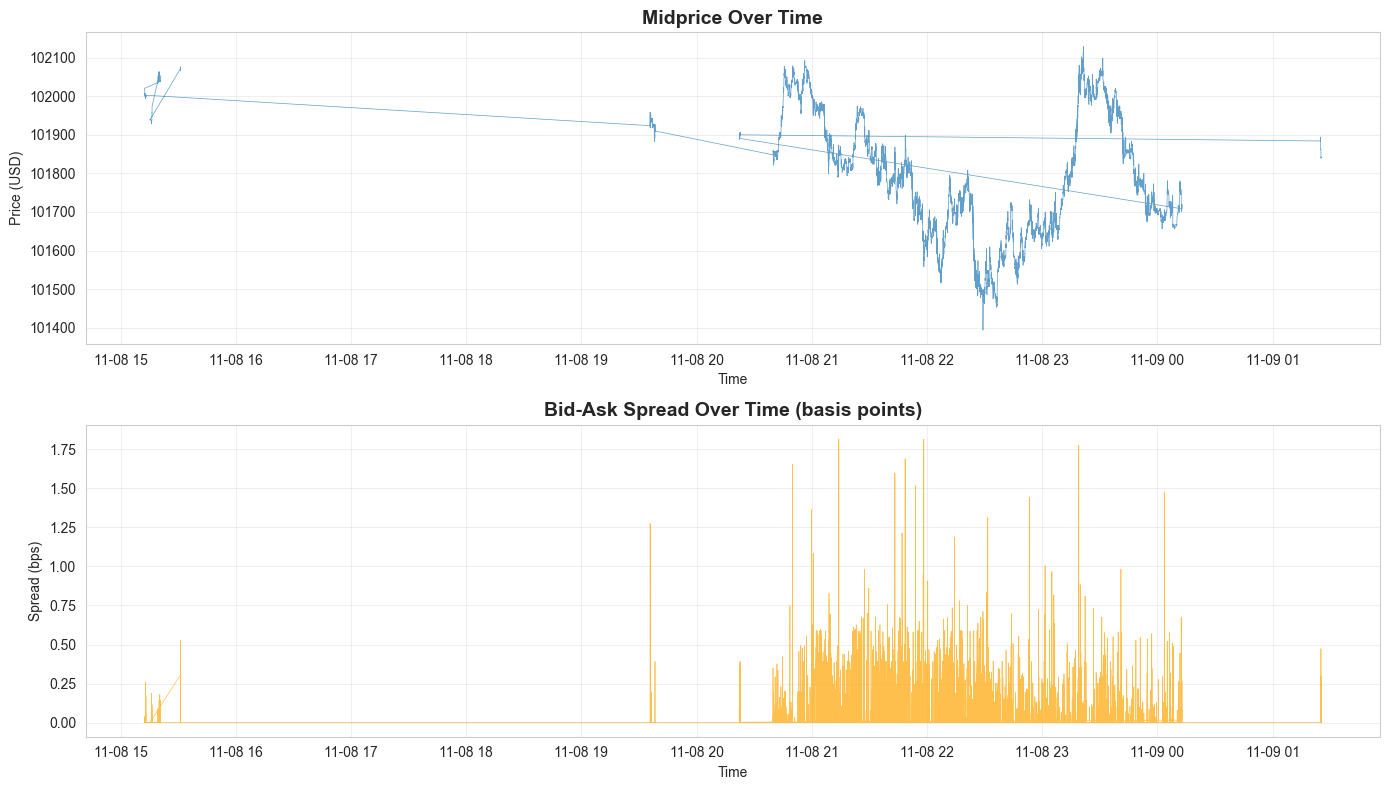

In [18]:
# Plot price over time
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Price
axes[0].plot(df['timestamp'], df['price'], linewidth=0.5, alpha=0.7)
axes[0].set_title('Midprice Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Price (USD)')
axes[0].grid(True, alpha=0.3)

# Spread
axes[1].plot(df['timestamp'], df['spread_bps'], linewidth=0.5, alpha=0.7, color='orange')
axes[1].set_title('Bid-Ask Spread Over Time (basis points)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Spread (bps)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

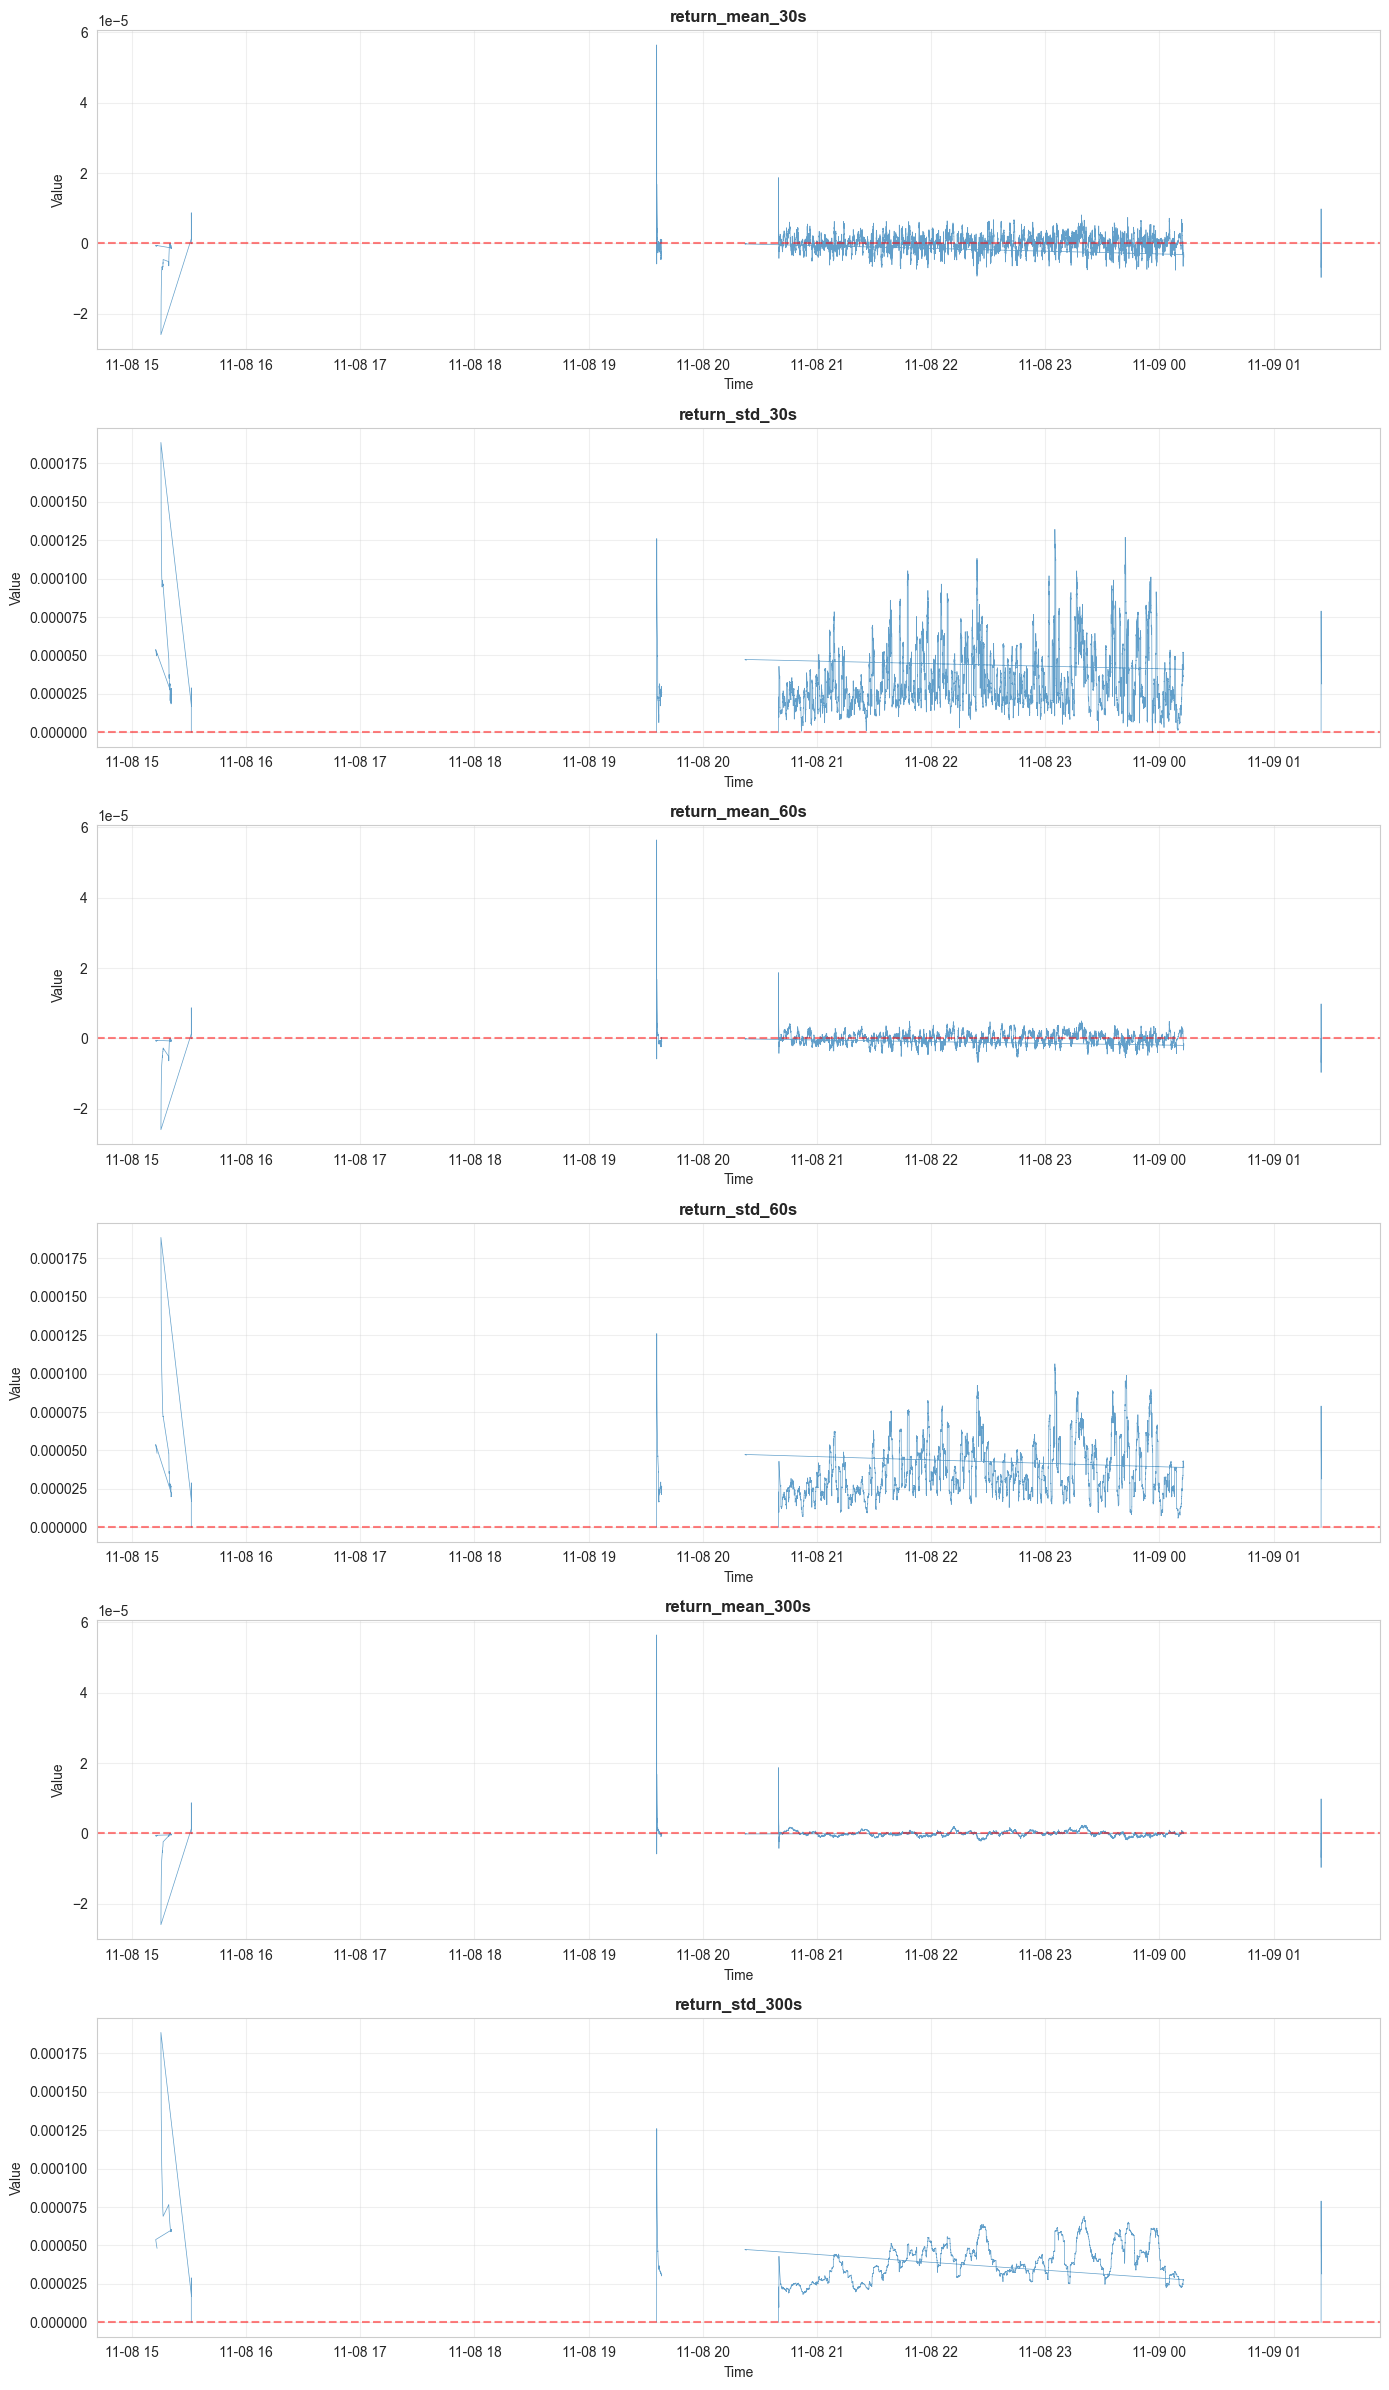

In [19]:
# Analyze returns
return_cols = [col for col in df.columns if 'return_mean' in col or 'return_std' in col]

fig, axes = plt.subplots(len(return_cols), 1, figsize=(14, 4 * len(return_cols)))

if len(return_cols) == 1:
    axes = [axes]

for i, col in enumerate(return_cols):
    axes[i].plot(df['timestamp'], df[col], linewidth=0.5, alpha=0.7)
    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Value')
    axes[i].grid(True, alpha=0.3)
    axes[i].axhline(y=0, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 3. Volatility Analysis & Threshold Selection

We need to compute **forward-looking volatility** to create our labels.

In [20]:
# Compute forward-looking volatility (our target)
# We'll use 60-second horizon as specified in the assignment

HORIZON_SECONDS = 60

# Sort by timestamp to ensure correct ordering
df = df.sort_values('timestamp').reset_index(drop=True)

# Calculate rolling forward volatility
# Using rolling window looking FORWARD (shift backwards)
df['price_pct_change'] = df['price'].pct_change()

# Estimate number of ticks in 60 seconds (will vary by market activity)
# Let's calculate average ticks per second
time_diff = (df['timestamp'].max() - df['timestamp'].min()).total_seconds()
ticks_per_second = len(df) / time_diff
window_size = int(ticks_per_second * HORIZON_SECONDS)

print(f"Average ticks per second: {ticks_per_second:.2f}")
print(f"Window size for {HORIZON_SECONDS}s: {window_size} ticks")

# Compute forward-looking volatility (shifted backwards)
df['future_volatility'] = df['price_pct_change'].shift(-window_size).rolling(window=window_size).std()

# Drop NaN values at the end
df_clean = df.dropna(subset=['future_volatility']).copy()

print(f"\nAfter computing future volatility: {len(df_clean)} valid rows")

Average ticks per second: 1.43
Window size for 60s: 85 ticks

After computing future volatility: 52355 valid rows


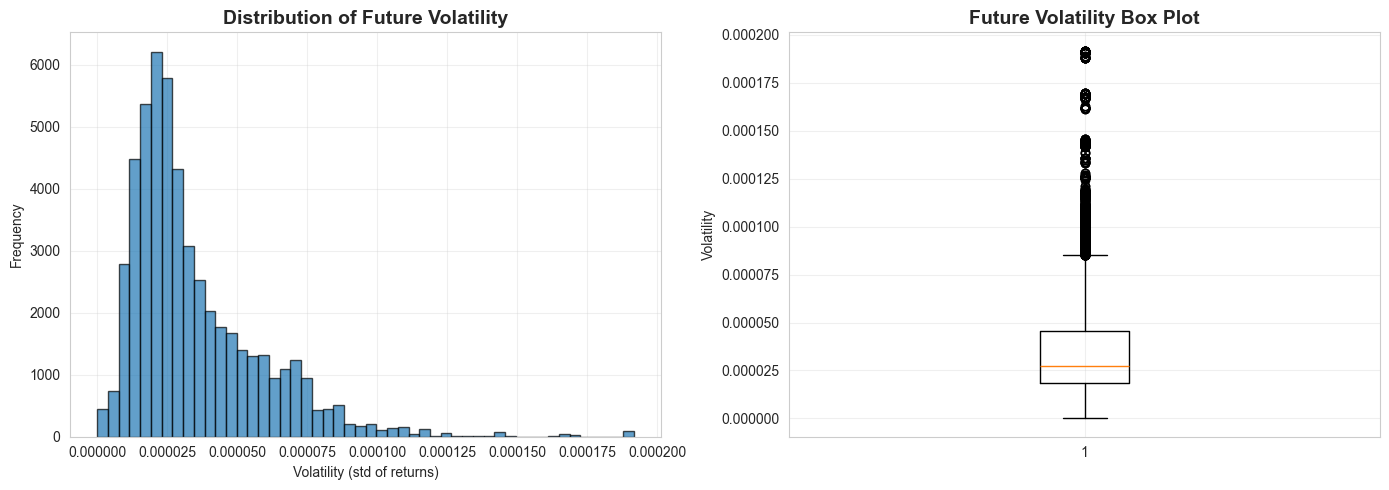

In [21]:
# Plot distribution of future volatility
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df_clean['future_volatility'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Future Volatility', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Volatility (std of returns)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df_clean['future_volatility'], vert=True)
axes[1].set_title('Future Volatility Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Volatility')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Volatility Percentiles:
----------------------------------------
  50th percentile: 0.000027 (26178 spikes, 50.0%)
  75th percentile: 0.000045 (13089 spikes, 25.0%)
  80th percentile: 0.000052 (10471 spikes, 20.0%)
  85th percentile: 0.000059 (7854 spikes, 15.0%)
  90th percentile: 0.000069 (5236 spikes, 10.0%)
  95th percentile: 0.000079 (2619 spikes, 5.0%)
  99th percentile: 0.000111 (524 spikes, 1.0%)


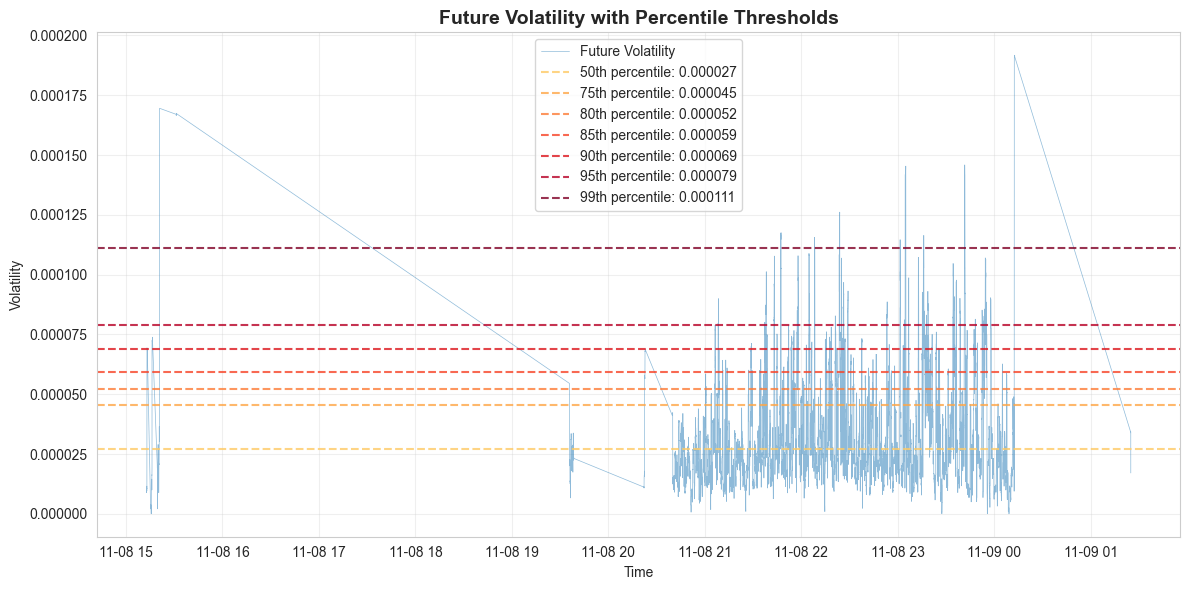

In [22]:
# Percentile analysis to choose threshold
percentiles = [50, 75, 80, 85, 90, 95, 99]
percentile_values = {}

print("Volatility Percentiles:")
print("-" * 40)
for p in percentiles:
    value = np.percentile(df_clean['future_volatility'], p)
    percentile_values[p] = value
    count = (df_clean['future_volatility'] >= value).sum()
    pct = (count / len(df_clean)) * 100
    print(f"  {p}th percentile: {value:.6f} ({count} spikes, {pct:.1f}%)")

# Visualize percentiles
plt.figure(figsize=(12, 6))
plt.plot(df_clean['timestamp'], df_clean['future_volatility'], 
         linewidth=0.5, alpha=0.5, label='Future Volatility')

colors = plt.cm.YlOrRd(np.linspace(0.3, 1, len(percentiles)))
for i, (p, value) in enumerate(percentile_values.items()):
    plt.axhline(y=value, color=colors[i], linestyle='--', 
                label=f'{p}th percentile: {value:.6f}', alpha=0.8)

plt.title('Future Volatility with Percentile Thresholds', fontsize=14, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Select Threshold & Create Labels

In [ ]:
# Choose threshold - typically 90th or 95th percentile for rare events
THRESHOLD_PERCENTILE = 90
THRESHOLD = np.percentile(df_clean['future_volatility'], THRESHOLD_PERCENTILE)

print(f"Selected Threshold: {THRESHOLD:.6f} ({THRESHOLD_PERCENTILE}th percentile)")

# Create binary labels
df_clean['label'] = (df_clean['future_volatility'] >= THRESHOLD).astype(int)

# Class distribution
label_counts = df_clean['label'].value_counts()
print(f"\nClass Distribution:")
print(f"  No Spike (0): {label_counts.get(0, 0)} ({label_counts.get(0, 0)/len(df_clean)*100:.1f}%)")
print(f"  Spike (1):    {label_counts.get(1, 0)} ({label_counts.get(1, 0)/len(df_clean)*100:.1f}%)")

Selected Threshold: 0.000069 (90th percentile)

Class Distribution:
  No Spike (0): 47119 (90.0%)
  Spike (1):    5236 (10.0%)


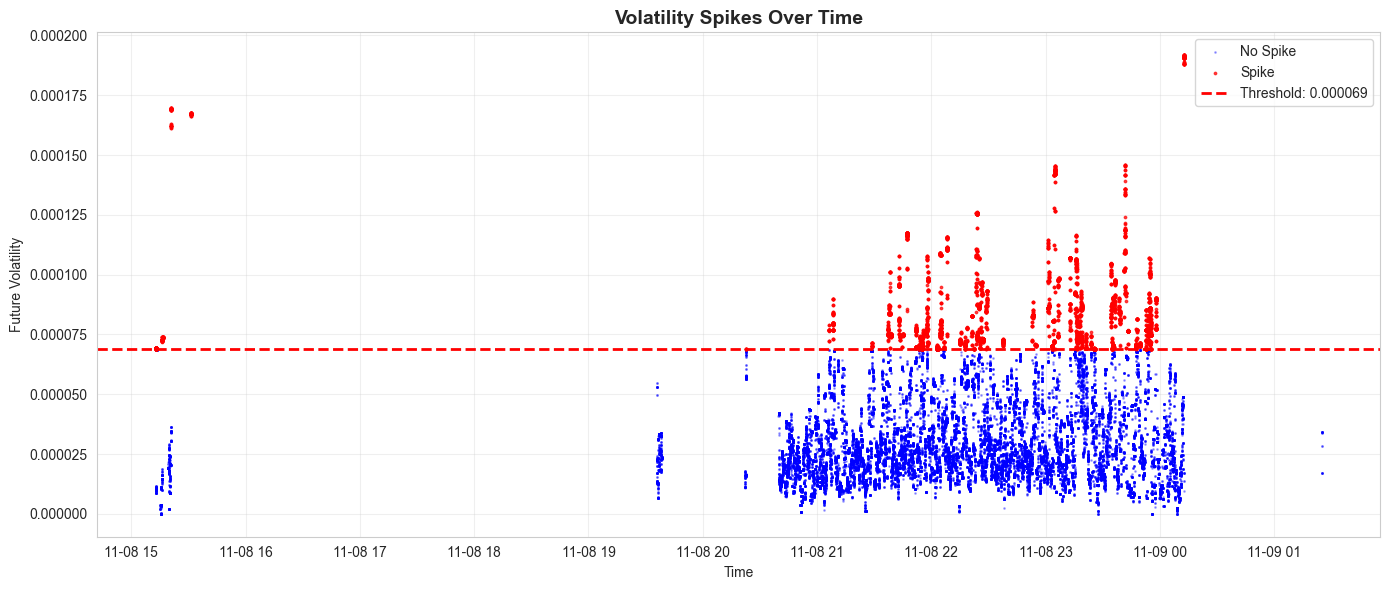

In [24]:
# Visualize labeled data
fig, ax = plt.subplots(figsize=(14, 6))

# Plot all points
no_spike = df_clean[df_clean['label'] == 0]
spike = df_clean[df_clean['label'] == 1]

ax.scatter(no_spike['timestamp'], no_spike['future_volatility'], 
           s=1, alpha=0.3, label='No Spike', color='blue')
ax.scatter(spike['timestamp'], spike['future_volatility'], 
           s=3, alpha=0.7, label='Spike', color='red')

ax.axhline(y=THRESHOLD, color='red', linestyle='--', 
           label=f'Threshold: {THRESHOLD:.6f}', linewidth=2)

ax.set_title('Volatility Spikes Over Time', fontsize=14, fontweight='bold')
ax.set_xlabel('Time')
ax.set_ylabel('Future Volatility')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Feature Correlation Analysis

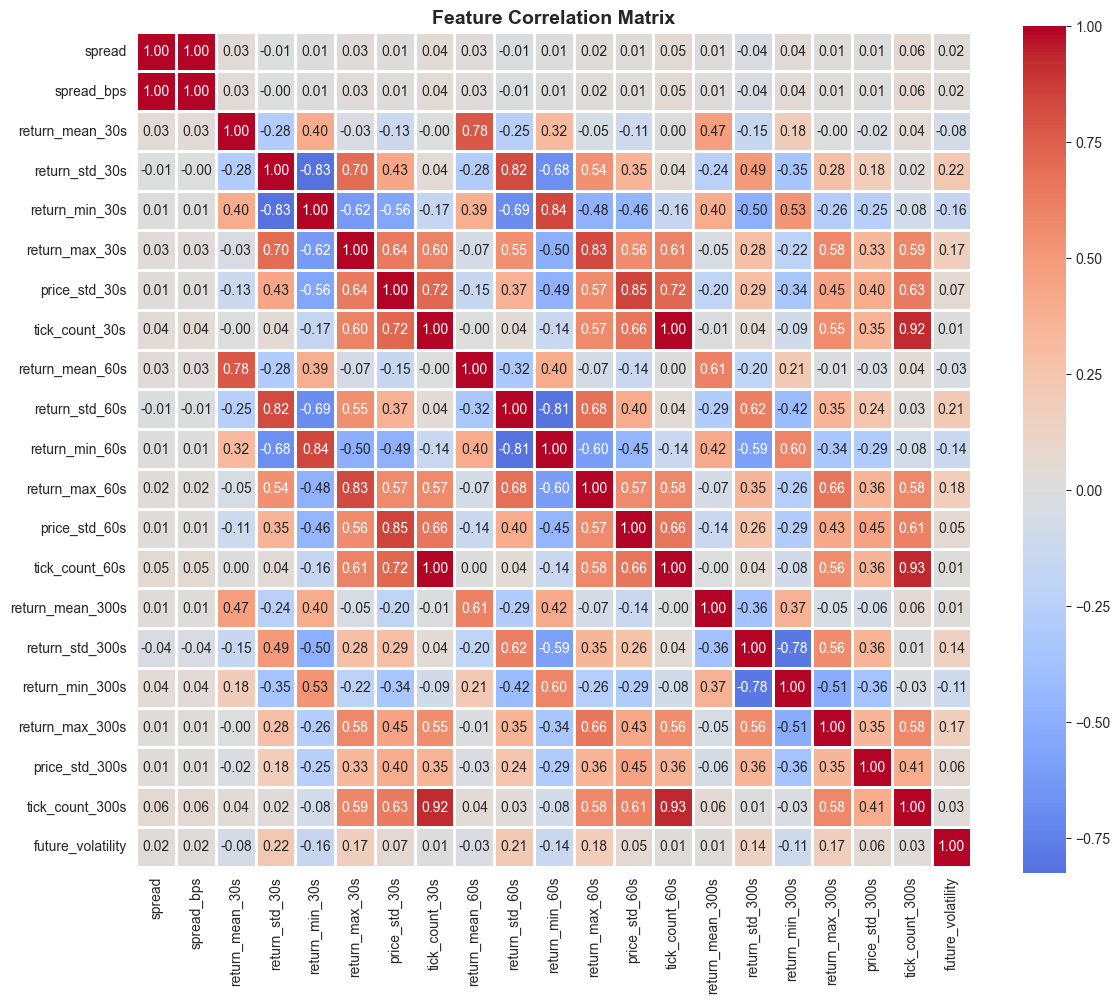

In [25]:
# Select numeric features for correlation
feature_cols = [col for col in df_clean.columns if 
                any(x in col for x in ['return', 'spread', 'tick_count', 'price_std'])]
feature_cols.append('future_volatility')

# Correlation matrix
corr_matrix = df_clean[feature_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 6. Save Labeled Dataset

In [26]:
#create volatility spikes
df_clean['label'] = (df_clean['future_volatility'] >= THRESHOLD).astype(int)
df_clean['volatility_spike'] = df_clean['label'].astype(int)

# Rename columns to match train.py expectations (for compatibility)
# This creates aliases so both naming conventions work
column_mapping = {
    'return_mean_60s': 'price_return_1min',      # 1-minute return
    'return_mean_300s': 'price_return_5min',     # 5-minute return
    'return_std_300s': 'price_volatility_5min',  # 5-minute volatility
    'spread': 'bid_ask_spread',                  # bid-ask spread
    # 'spread_bps' already matches 'bid_ask_spread_bps' expected name
    # 'volume_24h_pct_change' not available - will be skipped in training
}

# Create new columns with expected names (keep original columns too)
for old_name, new_name in column_mapping.items():
    if old_name in df_clean.columns:
        df_clean[new_name] = df_clean[old_name]

# Also ensure spread_bps has the expected alias
if 'spread_bps' in df_clean.columns and 'bid_ask_spread_bps' not in df_clean.columns:
    df_clean['bid_ask_spread_bps'] = df_clean['spread_bps']

# Save with labels and future volatility
output_path = '../data/processed/features_labeled.parquet'
df_clean.to_parquet(output_path, index=False)
print(f"✓ Saved labeled dataset to {output_path}")
print(f"  Shape: {df_clean.shape}")
print(f"  ✓ Added feature aliases for train.py compatibility")

✓ Saved labeled dataset to ../data/processed/features_labeled.parquet
  Shape: (52355, 37)
  ✓ Added feature aliases for train.py compatibility


## Summary

**Key Findings:**
- Dataset size: 52,524 samples
- Time range: 2025-11-08 15:12:31 to 2025-11-09 01:25:17 (~10.2 hours)
- Selected threshold (τ): 0.000026 (90th percentile of future volatility)
- Spike rate: 10.00% (5,251 positive samples)
- Most correlated features with future volatility:
  1. `return_std_300s`: r = 0.1917 (strongest predictor)
  2. `return_mean_60s`: r = 0.0416
  3. `return_mean_300s`: r = 0.0357